<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CH-6-DAG-&amp;-Causal-Terror" data-toc-modified-id="CH-6-DAG-&amp;-Causal-Terror-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CH 6 DAG &amp; Causal Terror</a></span><ul class="toc-item"><li><span><a href="#Multicollinearity" data-toc-modified-id="Multicollinearity-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Multicollinearity</a></span><ul class="toc-item"><li><span><a href="#Multicollinear-legs." data-toc-modified-id="Multicollinear-legs.-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Multicollinear legs.</a></span></li><li><span><a href="#Multicollinear-milk" data-toc-modified-id="Multicollinear-milk-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Multicollinear milk</a></span></li><li><span><a href="#How-bad-is-correlation?" data-toc-modified-id="How-bad-is-correlation?-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>How bad is correlation?</a></span></li></ul></li><li><span><a href="#Post-treatment-bias" data-toc-modified-id="Post-treatment-bias-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Post-treatment bias</a></span><ul class="toc-item"><li><span><a href="#Blocked-by-consequence." data-toc-modified-id="Blocked-by-consequence.-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Blocked by consequence.</a></span></li><li><span><a href="#Fungus-and-d-separation." data-toc-modified-id="Fungus-and-d-separation.-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Fungus and d-separation.</a></span></li></ul></li><li><span><a href="#Collider-bias" data-toc-modified-id="Collider-bias-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Collider bias</a></span><ul class="toc-item"><li><span><a href="#Collider-of-false-sorrow." data-toc-modified-id="Collider-of-false-sorrow.-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Collider of false sorrow.</a></span></li><li><span><a href="#The-haunted-DAG." data-toc-modified-id="The-haunted-DAG.-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>The haunted DAG.</a></span></li></ul></li><li><span><a href="#Confronting-confounding" data-toc-modified-id="Confronting-confounding-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Confronting confounding</a></span><ul class="toc-item"><li><span><a href="#Shutting-the-backdoor." data-toc-modified-id="Shutting-the-backdoor.-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Shutting the backdoor.</a></span></li><li><span><a href="#Two-road" data-toc-modified-id="Two-road-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Two road</a></span></li><li><span><a href="#Backdoor-waffles" data-toc-modified-id="Backdoor-waffles-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Backdoor waffles</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#MISC" data-toc-modified-id="MISC-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MISC</a></span></li></ul></div>

In [1]:
library(tidyverse)

# loads experimental branch of statistical rethinking pkg
library(rethinking)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: rstan

Loading required package: StanHeaders

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.


Attaching package: 'rstan'


The following object is masked from 'package:tidyr':

    extract


Loading r

# CH 6 DAG & Causal Terror

## Multicollinearity

<span style='background-color: lightgreen'>Multicollinearity</span> means very strong correlation between two or more predictor variables. The consequence of it is that the posterior distribution will seem to suggest that none of the variables is reliably associated with the outcome, even if all of the variables are in reality strongly associated with the outcome. This frustrating phenomenon arises from the details of how multiple regression works. In fact, there is nothing wrong with multicollinearity. The model will work fine for prediction.

### Multicollinear legs. 

The simulation example is predicting an individual’s height using the length of his or her legs as predictor variables. Surely height is positively associated with leg length, or at least the simulation will assume it is. Nevertheless, once you put both leg lengths into the model, something vexing will happen.

**<font color = 'purple' style='background-color: lightyellow'>The code below will simulate the heights and leg lengths of 100 individuals.</font>** 

* For each, first a height is simulated from a Gaussian distribution. 


* Then each individual gets a simulated proportion of height for their legs, ranging from 0.4 to 0.5. 


* Finally, each leg is salted with a little measurement or developmental error, so the left and right legs are not exactly the same length, as is typical in real populations. At the end, the code puts height and the two leg lengths into a common data frame.

In [2]:
## R code 6.2
## sample code for creating data on heights
N <- 100                          # number of individuals
set.seed(909)

height <- rnorm(N, mean = 10, sd = 2)           # sim total height of each

leg_prop <- runif(N, min = 0.4, max = 0.5)      # leg as proportion of height

leg_left <- leg_prop*height +     # sim left leg as proportion + error
    rnorm( N , 0 , 0.02 )

leg_right <- leg_prop*height +    # sim right leg as proportion + error
    rnorm( N , 0 , 0.02 )
                                  # combine into data frame
d <- data.frame(height,leg_left,leg_right)

In [32]:
d %>% head()

height,leg_left,leg_right
5.931417,2.679411,2.709286
6.512983,2.676428,2.680007
9.346628,3.927155,3.984947
9.233033,3.964191,3.993389
10.357128,4.427593,4.418766
10.088923,4.956641,4.971878


**<font color = 'purple' style='background-color: lightyellow'>Now let’s analyze these data, predicting the outcome height with both predictors, leg_left and leg_right. </font>** 

Before approximating the posterior, however, consider what we expect. <font color = 'blue'>On average, an individual’s legs are 45% of their height (in these simulated data). So we should expect the beta coefficient that measures the association of a leg with height to end up around the average height (10) divided by 45% of the average height (4.5).</font> That is 10/4.5 ≈ 2.2. Now let’s see what happens instead. I’ll use very vague, bad priors here, just so we can be sure that the priors aren’t responsible for what is about to happen.

In [3]:
## R code 6.3
m6.1 <- quap(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + bl*leg_left + br*leg_right ,
        a ~ dnorm( 10 , 100 ) ,
        bl ~ dnorm( 2 , 10 ) ,
        br ~ dnorm( 2 , 10 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=d )
precis(m6.1) %>% round(2)


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.98,0.28,0.53,1.44
bl,0.21,2.53,-3.83,4.25
br,1.78,2.53,-2.26,5.83
sigma,0.62,0.04,0.55,0.69


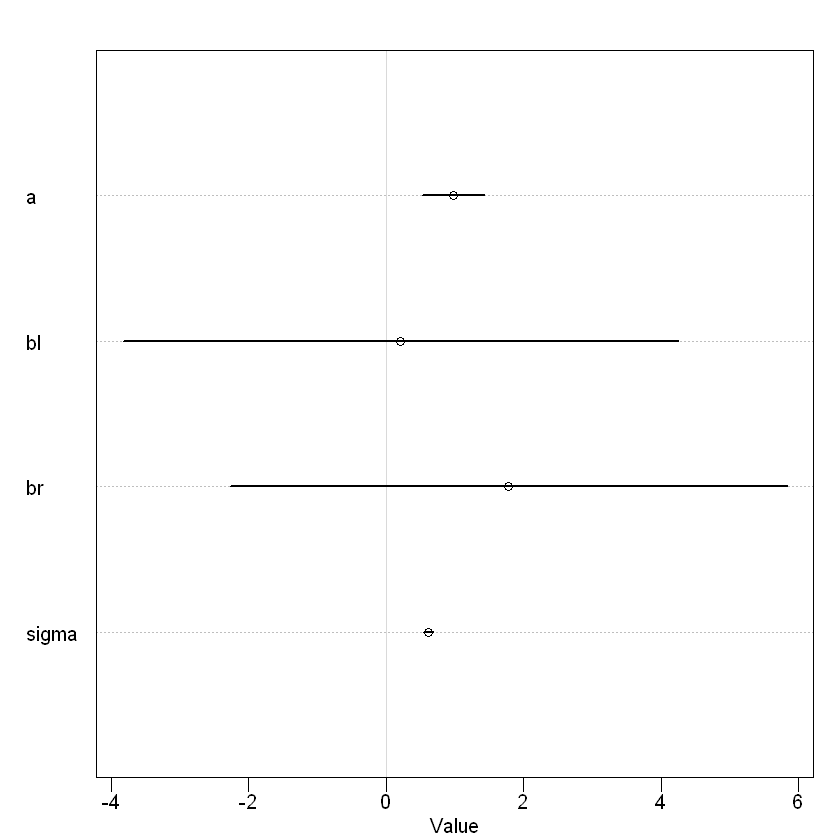

In [4]:
precis(m6.1) %>% plot()
# title(main="mu <- a + bl*leg_left + br*leg_right")

In [5]:
m6.1_stan_code <- stancode(m6.1)
m6.1_stan_code

//2020-01-06 13:16:41
data{
    int<lower=1> N;
    real height[N];
    real leg_left[N];
    real leg_right[N];
}
parameters{
    real a;
    real bl;
    real br;
    real<lower=0> sigma;
}
model{
    vector[N] mu;
    sigma ~ exponential( 1 );
    br ~ normal( 2 , 10 );
    bl ~ normal( 2 , 10 );
    a ~ normal( 10 , 100 );
    for ( i in 1:N ) {
        mu[i] = a + bl * leg_left[i] + br * leg_right[i];
    }
    height ~ normal( mu , sigma );
}
generated quantities{
    vector[N] mu;
    for ( i in 1:N ) {
        mu[i] = a + bl * leg_left[i] + br * leg_right[i];
    }
}



[1] "//2020-01-06 13:16:41\ndata{\n    int<lower=1> N;\n    real height[N];\n    real leg_left[N];\n    real leg_right[N];\n}\nparameters{\n    real a;\n    real bl;\n    real br;\n    real<lower=0> sigma;\n}\nmodel{\n    vector[N] mu;\n    sigma ~ exponential( 1 );\n    br ~ normal( 2 , 10 );\n    bl ~ normal( 2 , 10 );\n    a ~ normal( 10 , 100 );\n    for ( i in 1:N ) {\n        mu[i] = a + bl * leg_left[i] + br * leg_right[i];\n    }\n    height ~ normal( mu , sigma );\n}\ngenerated quantities{\n    vector[N] mu;\n    for ( i in 1:N ) {\n        mu[i] = a + bl * leg_left[i] + br * leg_right[i];\n    }\n}\n\n"

Those posterior means and standard deviations look crazy. This is a case in which a graphical view of the precis output is more useful, because it displays the posterior means and 89% intervals in a way that allows us with a glance to see that something has gone wrong here:

**<font color = 'purple' style='background-color: lightyellow'>If both legs have almost identical lengths, and height is so strongly associated with leg length, then why is this posterior distribution so weird? Did the posterior approximation work correctly?</font>**

It did work correctly, and the posterior distribution here is the right answer to the question we asked. <font color = 'red'>**The problem is the question.**</font> 

<font color = 'blue'>Recall that a multiple linear regression answers the question: What is the value of knowing each predictor, after already knowing all of the other predictors? So in this case, the question becomes:</font> **<font color = 'purple' style='background-color: lightyellow'>What is the value of knowing each leg’s length, after already knowing the other leg’s length? </font>**The answer to this weird question is equally weird, but perfectly logical. The posterior distribution is the answer to this question, considering every possible combination of the parameters and assigning relative plausibilities to every combination, conditional on this model and these data. It might help to look at the bivariate posterior distribution for `bl` and `br`:

<img src='pics/SR_l31.png' alt='Drawing' style='width:425pt'/>

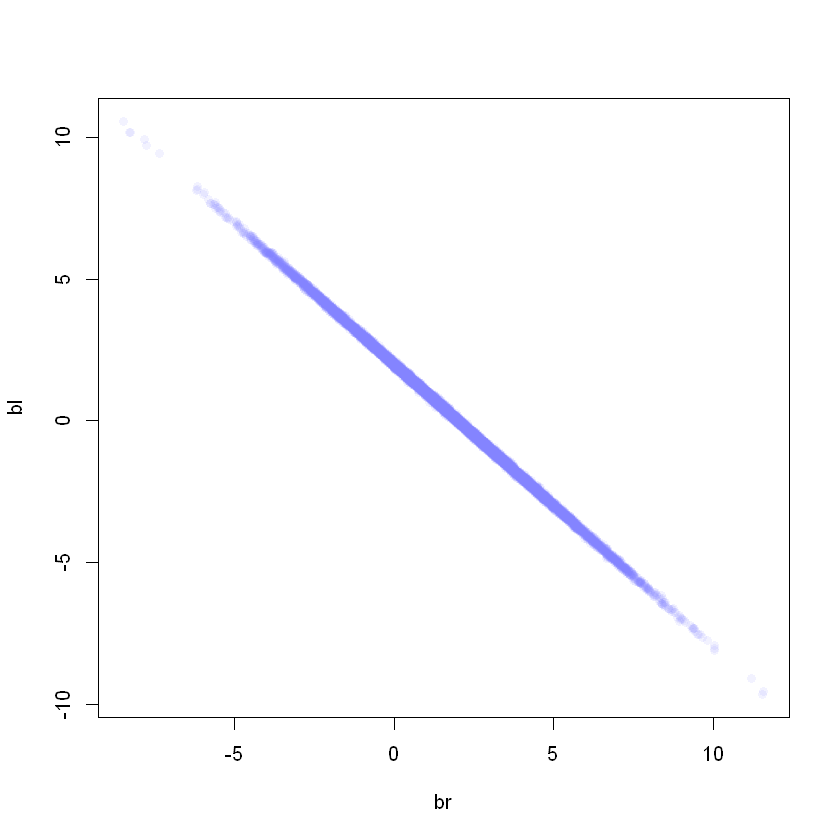

In [35]:
## R code 6.5
post <- extract.samples(m6.1)
plot( bl ~ br , post , col=col.alpha(rangi2,0.1) , pch=16 )

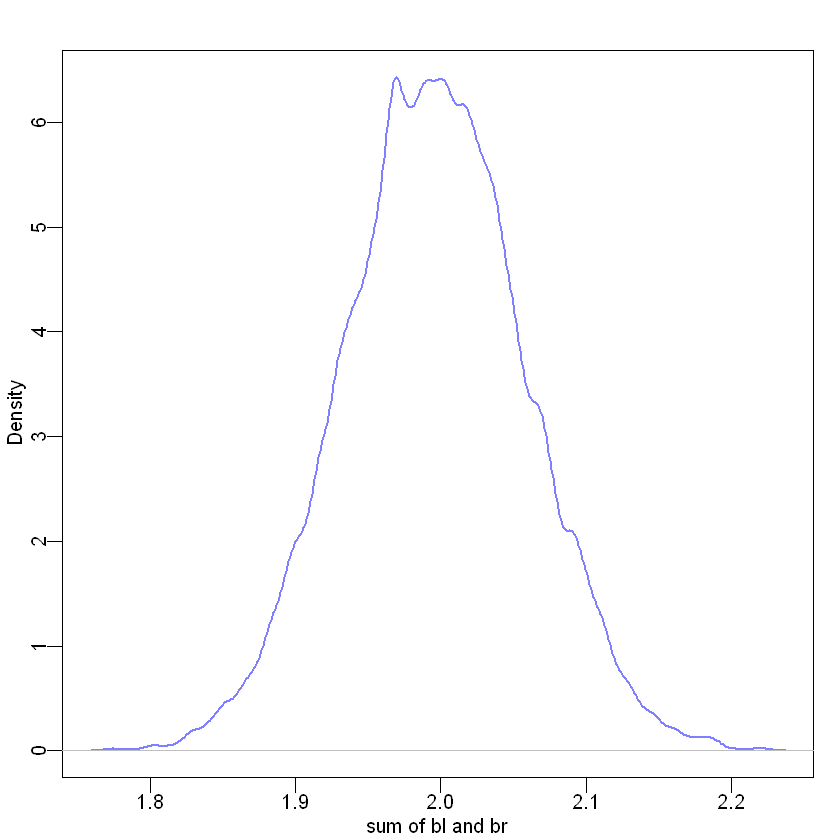

In [36]:
sum_blbr <- post$bl + post$br
dens( sum_blbr , col=rangi2 , lwd=2 , xlab="sum of bl and br" )

The resulting plot is shown on the left of Figure 6.2. The posterior distribution for these two parameters is very highly correlated, with all of the plausible values of bl and br lying along a narrow ridge. When bl is large, then br must be small. What has happened here is that since both leg variables contain almost exactly the same information, if you insist on including both in a model, then there will be a practically infinite number of combinations of bl and br that produce the same predictions.

<img src='pics/SR_l32.png' alt='Drawing' style='width:425pt'/>

In [8]:
## R code 6.7
m6.2 <- quap(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + bl*leg_left,
        a ~ dnorm( 10 , 100 ) ,
        bl ~ dnorm( 2 , 10 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=d )
precis(m6.2) %>% round(2)

,mean,sd,5.5%,94.5%
a,1.00,0.28,0.54,1.45
bl,1.99,0.06,1.89,2.09
sigma,0.62,0.04,0.55,0.69


<font color = 'blue'>When two predictor variables are very strongly correlated, including both in a model may lead to confusion</font>. 

<font color = 'red'>The posterior distribution isn’t wrong, in such cases. It’s telling you that the question you asked cannot be answered with these data</font>. And that’s a great thing for a model to say, that it cannot answer your question. And if you are just interested in prediction, you’ll find that this leg model makes fine predictions. It just doesn’t make any claims about which leg is more important. This leg example is clear and cute. But it is also purely statistical. We aren’t asking any serious causal questions here. Let’s try a more causally interesting example next.

### Multicollinear milk

In the leg length example, it’s easy to see that including both legs in the model is a little silly. But the problem that arises in real data sets is that we may not anticipate a clash between highly correlated predictors. And therefore we may mistakenly read the posterior distribution to say that neither predictor is important. In this section, we look at an example of this issue with real data.

Let’s return to the primate milk data from earlier in the chapter. Let’s get back the original data again:

In [37]:
data(milk)
d <- milk
d$K <- scale( d$kcal.per.g )
d$F <- scale( d$perc.fat )
d$L <- scale( d$perc.lactose )

In this example, we are concerned with the variables perc.fat (percent fat) and perc.lactose
(percent lactose) that we might use to model the total energy content, kcal.per.g. The code
above has already standardized these three variables. You’re going to use these three variables
to explore a natural case of multicollinearity. Note that there are no missing values, NA, in
these columns, so there’s no need here to extract complete cases. But you can rest assured
that quap, unlike reckless functions like lm, would never silently drop cases.
Start by modeling kcal.per.g as a function of perc.fat and perc.lactose, but in
two bivariate regressions. Look back in Chapter 5 (page 143), for a discussion of these priors.

In [42]:
## R code 6.9
# kcal.per.g regressed on perc.fat
m6.3 <- quap(
    alist(
        K ~ dnorm( mu , sigma ) ,
        mu <- a + bF*F ,
        a ~ dnorm( 0 , 0.2 ) ,
        bF ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data=d )

# kcal.per.g regressed on perc.lactose
m6.4 <- quap(
    alist(
        K ~ dnorm( mu , sigma ) ,
        mu <- a + bL*L ,
        a ~ dnorm( 0 , 0.2 ) ,
        bL ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) , data=d )

precis( m6.3 ) %>% round(2)
precis( m6.4 ) %>% round(2)


,mean,sd,5.5%,94.5%
a,0.00,0.08,-0.12,0.12
bF,0.86,0.08,0.73,1.00
sigma,0.45,0.06,0.36,0.54


,mean,sd,5.5%,94.5%
a,0.00,0.07,-0.11,0.11
bL,-0.90,0.07,-1.02,-0.79
sigma,0.38,0.05,0.30,0.46


<font color = 'blue'>The posterior distributions for `bF` and `bL` are essentially mirror images of one another</font>. 

* The posterior mean of bF is as positive as the mean of bL is negative. Both are narrow posterior distributions that lie almost entirely on one side or the other of zero. Given the strong association of each predictor with the outcome, we might conclude that both variables are reliable predictors of total energy in milk, across species. 

    The more fat, the more kilocalories in the milk. The more lactose, the fewer kilocalories in milk. 
    
**<font color = 'purple' style='background-color: lightyellow'>But watch what happens when we place both predictor variables in the same regression model:</font>**

In [47]:
## R code 6.10
m6.5 <- quap(
    alist(
        K ~ dnorm( mu , sigma ) ,
        mu <- a + bF*F + bL*L ,
        a ~ dnorm( 0 , 0.2 ) ,
        bF ~ dnorm( 0 , 0.5 ) ,
        bL ~ dnorm( 0 , 0.5 ) ,
        sigma ~ dexp( 1 )
    ) ,
    data=d )
precis( m6.5 ) %>% round(2)

,mean,sd,5.5%,94.5%
a,0.00,0.07,-0.11,0.11
bF,0.24,0.18,-0.05,0.54
bL,-0.68,0.18,-0.97,-0.38
sigma,0.38,0.05,0.30,0.46


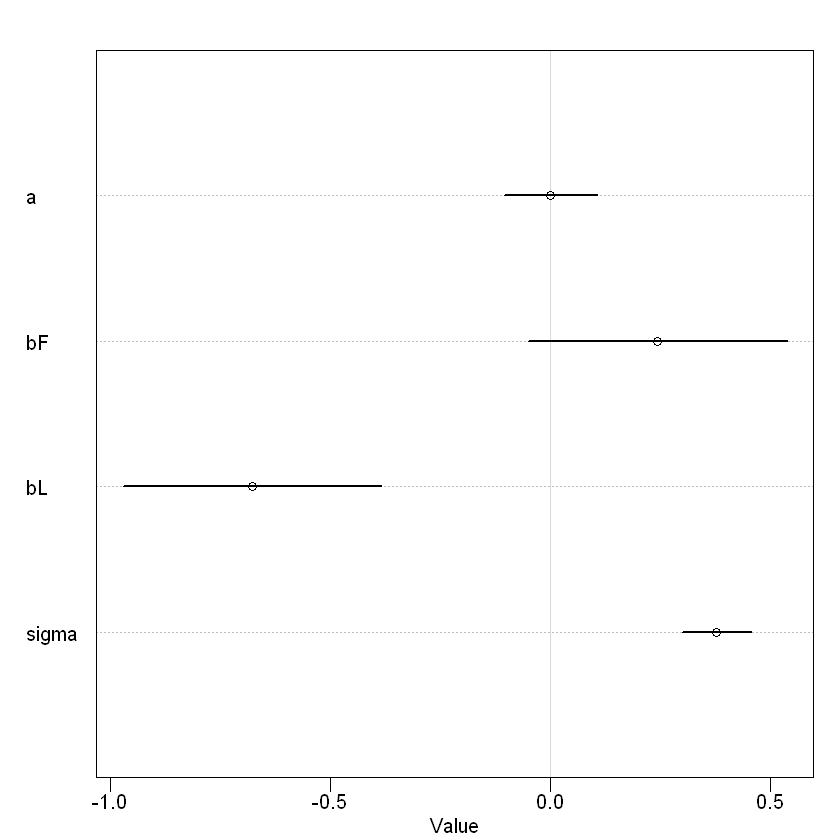

In [48]:
precis( m6.5 ) %>% plot()

<font color = 'blue'>Now the posterior means of both `bF` and `bL` are closer to zero. And the standard deviations for both parameters are twice as large as in the bivariate models (m6.3 and m6.4)</font>. This is the same statistical phenomenon as in the leg length example. What has happened is that the variables perc.fat and perc.lactose contain much of the same information.

<font color = 'blue'>They are almost substitutes for one another. As a result, when you include both in a regression, the posterior distribution ends up describing a long ridge of combinations of bF and bL that are equally plausible</font>. In the case of the fat and lactose, these two variables form essentially a single axis of variation. The easiest way to see this is to use a pairs plot:

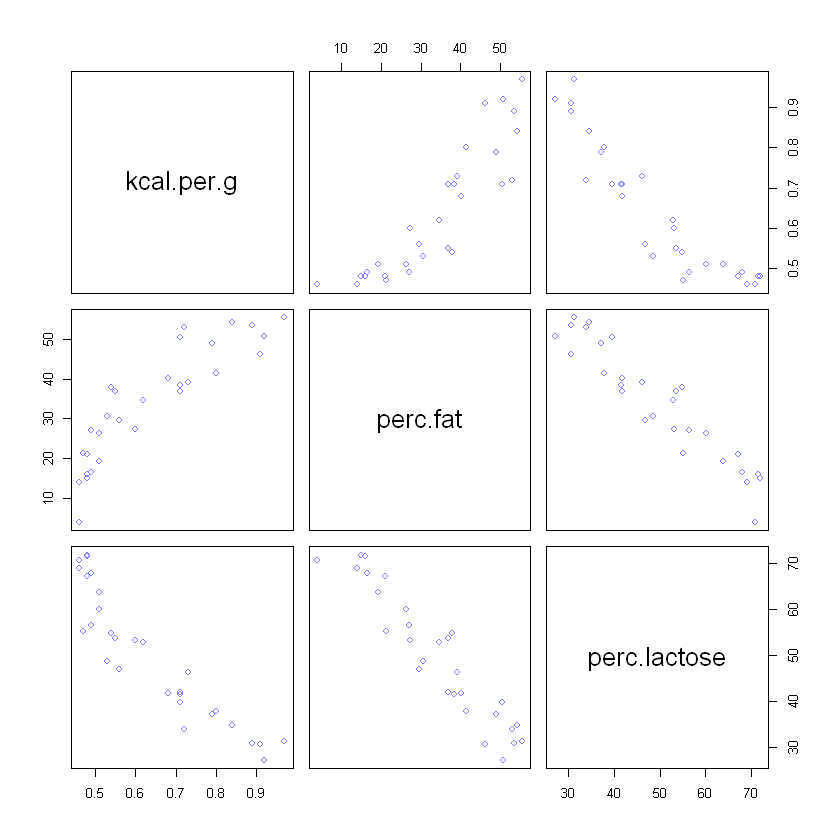

In [38]:
pairs( ~ kcal.per.g + perc.fat + perc.lactose , data=d , col=rangi2 ) 
options(repr.plot.width=3, repr.plot.height=2)

<font color = 'blue'>Notice that percent fat is positively correlated with the outcome, while percent lactose is negatively correlated with it</font>. Now look at the right-most scatterplot in the middle row. This plot is the scatter of percent fat (vertical) against percent lactose (horizontal). <font color = 'red'>Notice that the points line up almost entirely along a straight line. These two variables are negatively correlated, and so strongly so that they are nearly redundant</font>. <font color = 'blue'>**Either helps in predicting kcal.per.g, but neither helps much once you already know the other.**</font>

<font color = 'blue'>What is likely going on, scientifically, in the milk example is that there is a core tradeoff in milk composition that mammal mothers must obey. If a species nurses often, then the milk tends to be watery and low in energy. Such milk is high in sugar (lactose). If instead a species nurses rarely, in short bouts, then the milk needs to be higher in energy. Such milk is very high in fat</font>. This implies a causal model something like this:

<img src='pics/SR_l33.png' alt='Drawing' style='width:225pt'/>

The central tradeoff decides how dense, D, the milk needs to be. Then fat, F, and lactose, L, are determined. Finally, the composition of F and L determines the kilocalories, K. If we could measure D, or had an evolutionary and economic model to predict it based upon other aspects of a species, that would be better than stumbling through regressions.

### How bad is correlation? 

The correlation between the two milk variables is:

In [49]:
## R code 6.12
cor( d$perc.fat , d$perc.lactose )

[1] -0.9416373

That’s a pretty strong correlation. **<font color = 'purple' style='background-color: lightyellow'>How strong does a correlation have to get, before you should start worrying about multicollinearity? There’s no easy answer to that question</font>**. Correlations do have to get pretty high before this problem interferes with your analysis. And what matters isn’t just the correlation between a pair of variables. Rather, <font color = 'red'>**what matters is the correlation that remains after accounting for any other predictors**</font>. So really what you need, as always, is some conceptual model for how these variables produce observations.

**<font color = 'purple' style='background-color: lightyellow'>But with only two predictors here, we can address the correlation question directly, with a little simulation experiment.</font>** 

* Suppose we have only kcal.per.g and perc.fat. Now we construct a random predictor variable, call it x, that is correlated with perc.fat at some predetermined level. 


* Then fit the regression model that tries to predict kcal.per.g using both perc.fat and our random fake variable x. 


* Record the standard error of the estimated effect of perc.fat. 


* Now repeat this procedure many times, at different levels of correlation between perc.fat and x.

**<font color = 'purple' style='background-color: lightyellow'>If you do this, you’ll get a plot like that in Figure 6.4.</font>** 

* The vertical axis is the average standard deviation across 100 regressions, using a simulated correlated predictor variable x. 

* The horizontal axis shows the intensity of correlation between x and perc.fat. When the two variables are uncorrelated, on the left side of the plot, then the standard deviation of the posterior is small. This means the posterior distribution is piled up a narrow range of values. 

* As the correlation increases—and keep in mind that we aren’t adding any information here, just a correlated string of random numbers—the standard deviation inflates. <font color = 'red'>But the effect is far from linear; it accelerates rapidly, as the correlation increases. Above a correlation of 0.9, the standard deviation increases very rapidly, approaching in fact ∞ as the correlation approaches 1</font>. The code for producing this plot contains some techniques not yet explained, so I include it in an optional Overthinking box at the end of this section.

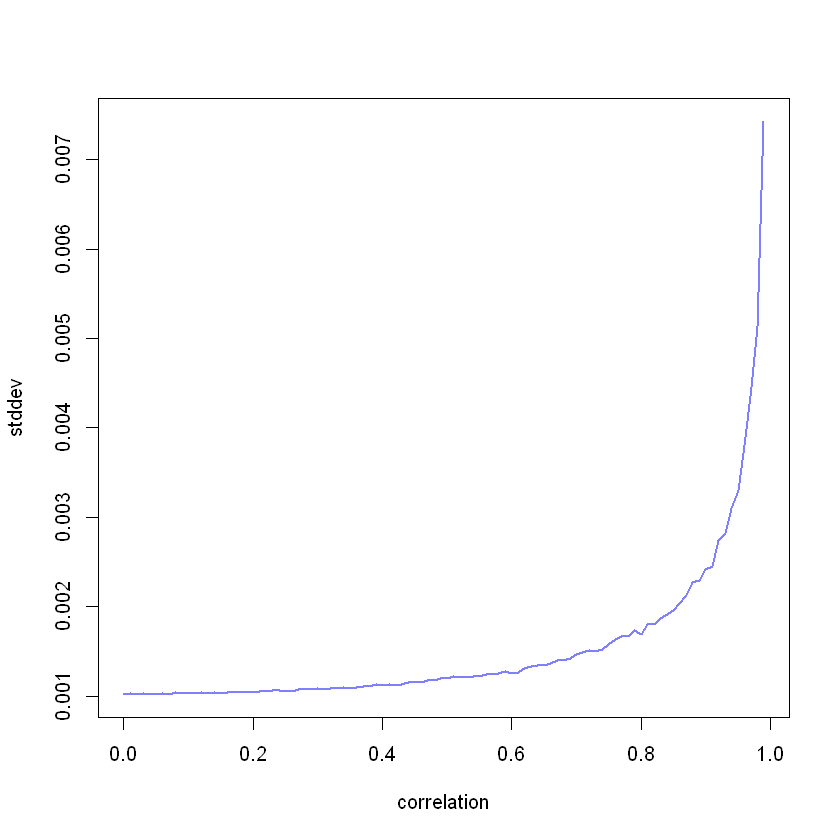

In [50]:
data(milk)
d <- milk
sim.coll <- function( r=0.9 ) {
    d$x <- rnorm( nrow(d) , mean=r*d$perc.fat ,
        sd=sqrt( (1-r^2)*var(d$perc.fat) ) )
    m <- lm( kcal.per.g ~ perc.fat + x , data=d )
    sqrt( diag( vcov(m) ) )[2] # stddev of parameter
}
rep.sim.coll <- function( r=0.9 , n=100 ) {
    stddev <- replicate( n , sim.coll(r) )
    mean(stddev)
}
r.seq <- seq(from=0,to=0.99,by=0.01)
stddev <- sapply( r.seq , function(z) rep.sim.coll(r=z,n=100) )
plot( stddev ~ r.seq , type="l" , col=rangi2, lwd=2 , xlab="correlation" )

**<font color = 'purple' style='background-color: lightyellow'>What can be done about multicollinearity?</font>** The best thing to do is be aware of it. <font color = 'red'>You can anticipate this problem by checking the predictor variables against one another in a pairs plot. Any pair or cluster of variables with very large correlations, over about 0.9, may be problematic</font>, once included in the same model. 

However, it isn’t always true that highly correlated variables are completely redundant—other predictors might be correlated with only one of the pair, and so help extract the unique information each predictor provides. <font color = 'red'>So you can’t know just from a table of correlations nor from a matrix of scatterplots whether multicollinearity will prevent you from including sets of variables in the same model</font>. 

<font color = 'red'>We always need conceptual models, based upon scientific background, to do useful statistics. The data themselves just aren’t enough</font>.

Different disciplines have different conventions for dealing with collinear variables. In some fields, it is typical to engage in some kind of data reduction procedure, like <span style='background-color: lightgreen'>principle components</span> or <span style='background-color: lightgreen'>factor analysis</span>, and then to use the components/factors as predictor variables.

In other fields, this is considered voodoo, because <font color = 'red'>principle components and factors are notoriously hard to interpret, and there are usually hidden decisions that go into producing them</font>. 

* It is also difficult to use such constructed variables in prediction, because learning that component 2 is associated with an outcome doesn’t immediately tell us how any real measurement is associated with the outcome. 

With experience, you can cope with these issues, but they remain issues. <font color = 'blue'>A popular defensive approach is to show that models using any one member from a cluster of highly correlated variables will produce the same inferences and predictions</font>. 

* <font color = 'purple'>For example</font>, sometimes rainfall and soil moisture are highly correlated across sites in an ecological analysis. Using both in a model meant to predict presence/absence of a species of plant may run afoul of multicollinearity, but if you can show that a model with either produces nearly the same predictions, it will be reassuring that both get at the same underlying ecological dimension.


<font color = 'blue'>**Best of all, of course, is to have a trusted causal model that tells you which variable to lean on**</font>. But when that isn’t the case, it is still worth discussing alternative causal models and how they could resolve the correlation structure.

<font color = 'blue'>**The problem of multicollinearity is really a member of a family of problems with fitting models, a family sometimes known as non-identifiability**</font>. 

* <font color = 'green'>**When a parameter is nonidentifiable, it means that the structure of the data and model do not make it possible to estimate the parameter’s value**</font>. 

* Sometimes this problem arises from mistakes in coding a model, but many important types of models present non-identifiable or weakly identifiable parameters, even when coded completely correctly.

In general, there’s no guarantee that the available data contain much information about a parameter of interest. When that’s true, your Bayesian machine will return a very wide posterior distribution. That doesn’t mean anything is wrong—you got the right answer to the question you asked. But it might lead you to ask a better question. <font color = 'blue'>But it’s usually helpful to check the covariation among parameters, especially when intervals are extremely wide, so you don’t misinterpret what the model is trying to tell you</font>.

**Rethinking: Identification guaranteed; comprehension up to you**. Technically speaking, identifiability is not a concern for Bayesian models. The reason is that as long as the posterior distribution is proper—which just means that it integrates to 1—then all of the parameters are identified. But this technical fact doesn’t also mean that you can make sense of the posterior distribution. So it’s probably better to speak of weakly identified parameters in a Bayesian context. There will be several examples as the book progresses.

## Post-treatment bias

It is routine to worry about mistaken inferences that arise from omitting predictor variables. Such mistakes are often called omitted variable bias, and the examples from the previous chapter illustrate it. <font color = 'red'>It is much less routine to worry about mistaken inferences arising from including variables that are consequences of other variables. We’ll call this posttreatment bias</font>.82

The language “post-treatment” comes from thinking about experimental designs, but the problem also applies to observational studies. Suppose for example that you are growing some plants in a greenhouse. You want to know the difference in growth under different antifungal soil treatments, because fungus on the plants tends to reduce their growth. Plants are initially seeded and sprout. Their heights are measured. Then different soil treatments are applied. Final measures are the height of the plant and the presence of fungus. There are four variables of interest here: initial height, final height, treatment, and presence of fungus. Final height is the outcome of interest. But which of the other variables should be in the model? If your goal is to make a causal inference about the treatment, you shouldn’t include the presence of fungus, because it is a post-treatment effect.

Let’s simulate some data, to make the example more transparent and see what exactly goes wrong when we include a post-treatment variable.

In [13]:
## R code 6.14
set.seed(71)
# number of plants
N <- 100

# simulate initial heights
h0 <- rnorm(N,10,2)

# assign treatments and simulate fungus and growth
treatment <- rep( 0:1 , each=N/2 )
fungus <- rbinom( N , size=1 , prob=0.5 - treatment*0.4 )
h1 <- h0 + rnorm(N, 5 - 3*fungus)

# compose a clean data frame
d <- data.frame( h0=h0 , h1=h1 , treatment=treatment , fungus=fungus )
precis(d)[,1:4]


,mean,sd,5.5%,94.5%
h0,9.95978,2.1011623,6.570328,13.07874
h1,14.39920,2.6880870,10.618002,17.93369
treatment,0.50000,0.5025189,0.000000,1.00000
fungus,0.23000,0.4229526,0.000000,1.00000


In [14]:
d %>% head

h0,h1,treatment,fungus
9.136316,14.34579,0,0
9.105626,15.62392,0,0
9.042855,14.38667,0,0
10.834291,15.83742,0,0
9.164199,11.46912,0,1
7.625672,11.10776,0,0


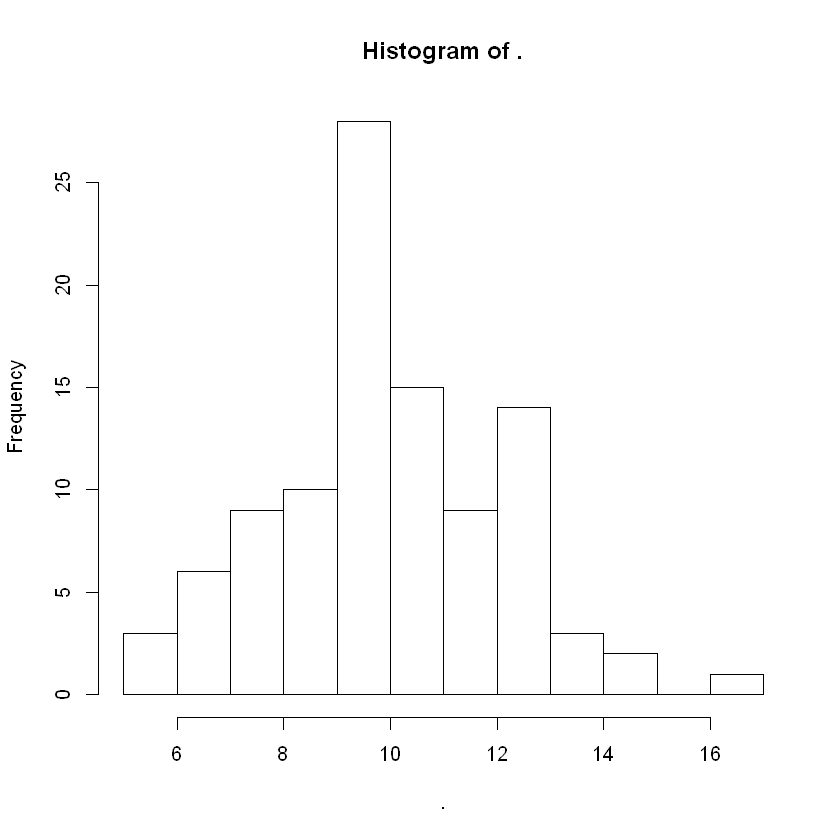

In [15]:
d$h0 %>% hist

<img src='pics/SR_l34.png' alt='Drawing' style='width:425pt'/>

,mean,sd,5.5%,94.5%
sim_p,1.04,0.26,0.68,1.49


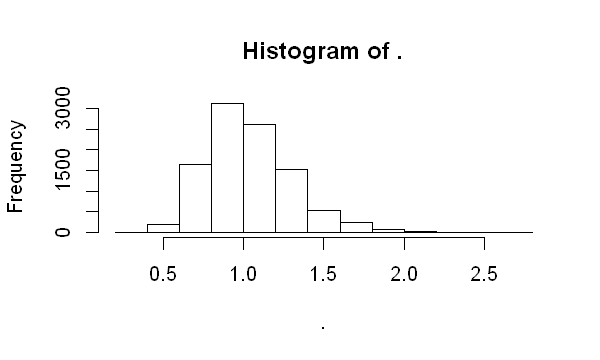

In [89]:
## R code 6.15
sim_p <- rlnorm( 1e4 , 0 , 0.25 )
# rlnorm(n, meanlog = 0, sdlog = 1)
precis( data.frame(sim_p) )[,1:4] %>% round(2)

sim_p %>% hist()

options(repr.plot.width=5,repr.plot.height=3)

So this prior expects anything from 40% shrinkage up to 50% growth. Let’s fit this model, so you can see how it just measures the average growth in the experiment.

In [8]:
## R code 6.16
m6.6 <- quap(
    alist(
        h1 ~ dnorm( mu , sigma ),
        mu <- h0*p,
        p ~ dlnorm( 0 , 0.25 ),
        sigma ~ dexp( 1 )
    ), data=d )
precis(m6.6) %>% round(2)

,mean,sd,5.5%,94.5%
p,1.43,0.02,1.40,1.45
sigma,1.79,0.13,1.59,1.99


About 40% growth, on average. 

**<font color = 'purple' style='background-color: lightyellow'>Now to include the treatment and fungus variables. </font>**

We’ll include both of them, following the notion that we’d like to measure the impact of both the treatment and the fungus itself. 

The parameters for these variables will also be on the proportion scale. They will be changes in proportion growth. So we’re going to make a linear model of p now.

<img src='pics/SR_l35.png' alt='Drawing' style='width:125pt'/>

The proportion of growth `p` is now a function of the predictor variables. It looks like any other linear model. 

* The priors on the slopes are almost certainly too flat. They place 95% of the prior mass between −1 (100% reduction) and +1 (100% increase) and two-thirds of the prior mass between −0.5 and +0.5. 

After we finish this section, you may want to loop back and try simulating from these priors. Here’s the code to approximate the posterior:

In [5]:
## R code 6.17
m6.7 <- quap(
    alist(
        h1 ~ dnorm( mu , sigma ),
        mu <- h0 * p,
        p <- a + bt*treatment + bf*fungus,
        a ~ dlnorm( 0 , 0.2 ) ,
        bt ~ dnorm( 0 , 0.5 ),
        bf ~ dnorm( 0 , 0.5 ),
        sigma ~ dexp( 1 )
    ), data=d )
precis(m6.7) %>% round(2)

,mean,sd,5.5%,94.5%
a,1.48,0.02,1.44,1.52
bt,0.00,0.03,-0.05,0.05
bf,-0.27,0.04,-0.33,-0.21
sigma,1.41,0.10,1.25,1.57


That `a` parameter is the same as `p` before. And it has nearly the same posterior. The marginal posterior for `bt`, the effect of treatment, is solidly zero, with a tight interval. The treatment is not associated with growth. The fungus seems to have hurt growth, however. 

**<font color = 'purple' style='background-color: lightyellow'>Given that we know the treatment matters, because we built the simulation that way, what happened here?</font>**

### Blocked by consequence.

The problem is that fungus is mostly a consequence of treatment. This is to say that fungus is a post-treatment variable. So when we control for fungus,<font color = 'red'> the model is implicitly answering the question: Once we already know whether or not a plant developed fungus, does soil treatment matter? </font>

* The answer is “no,” because soil treatment has its effects on growth through reducing fungus. <font color = 'blue'>But we actually want to know, based on the design of the experiment, is the impact of treatment on growth. </font>


* To measure this properly, we should omit the post-treatment variable fungus. 

**<font color = 'purple' style='background-color: lightyellow'>Here’s what the inference looks like in that case:</font>**

In [9]:
## R code 6.18
m6.8 <- quap(
    alist(
        h1 ~ dnorm( mu , sigma ),
        mu <- h0 * p,
        p <- a + bt*treatment,
        a ~ dlnorm( 0 , 0.2 ),
        bt ~ dnorm( 0 , 0.5 ),
        sigma ~ dexp( 1 )
    ), data=d )
precis(m6.8) %>% round(2)


,mean,sd,5.5%,94.5%
a,1.38,0.03,1.34,1.42
bt,0.08,0.03,0.03,0.14
sigma,1.75,0.12,1.55,1.94


Now the impact of treatment is clearly positive, as it should be. It makes sense to control for pre-treatment differences, like the initial height h0, that might mask the causal influence of treatment. <font color = 'red'>But including post-treatment variables can actually mask the treatment itself</font>. 

* This doesn’t mean you don’t want the model that includes both treatment and fungus. <font color = 'blue'>The fact that including fungus zeros the coefficient for treatment suggests that the treatment works for exactly the anticipated reasons. It tells us about mechanism</font>.<font color = 'red'> But a correct inference about the treatment still depends upon omitting the post-treatment variable.</font>

### Fungus and d-separation.

It helps to look at this problem in terms of a DAG. In this case, I’ll show you how to draw it using the dagitty R package, because we are going to use that package now to do some graph analysis.

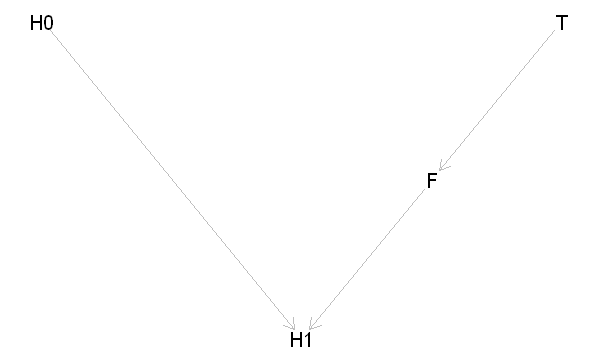

In [101]:
## R code 6.19
library(dagitty)
plant_dag <- dagitty( "dag {
    H0 -> H1
    F -> H1
    T -> F
}")
coordinates( plant_dag ) <- list( x=c(H0=0,T=2,F=1.5,H1=1) ,
                                  y=c(H0=0,T=0,F=1,H1=2) )
plot( plant_dag )


* So the treatment T influences the presence of fungus F which influences plant height at time 1, H1. 


* Plant height at time 1 is also influenced by plant height at time 0, H0. That’s our DAG. When we include F, the post-treatment effect, in the model, we end up blocking the path from the treatment to the outcome. 

<font color = 'blue'>This is the DAG way of saying that learning the treatment tells us nothing about the outcome, once we know the fungus status.</font>

> An even more DAG way to say this is that conditioning on F induces d-separation. The “d” stands for dependence. <span style='background-color: lightgreen'>d-separation</span> <font color = 'green'>means that some variables are independent of others, given that we condition on some other set of variables</font>. 

<font color = 'purple'>In this case, H1 is d-separated from T when we condition on F</font>. <font color = 'green'>**If we do not condition on F, then they are not d-separated. This is important, because it tells us which kinds of statistical models and observations can test our causal model and which cannot**</font>.

<font color = 'green'>**You can make dagitty analyze the DAG for d-separation:**</font>

In [102]:
## R code 6.20
dseparated( plant_dag , "T" , "H1" , "F" )
dseparated( plant_dag , "T" , "H1" )


[1] TRUE

[1] FALSE

<font color = 'green'>**You can also ask for all of the implied conditional independencies in the graph:**</font>

In [103]:
## R code 6.21
impliedConditionalIndependencies( plant_dag )


F _||_ H0
H0 _||_ T
H1 _||_ T | F

<font color = 'blue'>That `_||_` thing means “independent of.” So fungus and initial height are always independent. Initial height and treatment are always independent. And then comes the posttreatment relationship: Final height is independent of treatment, when conditioning on fungus</font>.


<font color = 'blue'>The problem of post-treatment variables applies just as well to observational studies as it does to experiments. But in experiments, it can be easy to tell which variables are pretreatment, like h0, and which are post-treatment, like fungus</font>. <font color = 'blue'>**In observational studies, it is harder to know. But that just makes having a clear causal model even more important. Just tossing variables into a regression model, without pausing to think about path relationships, is a bad idea**</font>.

**Rethinking**: Model selection doesn’t help. In the next chapter, you’ll learn about model selection using information criteria. <font color = 'blue'>Like other model comparison and selection schemes, these criteria help in contrasting and choosing model structure. But such approaches are no help in the example presented just above, since the model that includes fungus both fits the sample better and would make better out-of-sample predictions. </font>
    
<font color = 'red'>Model m6.7 misleads because it asks the wrong question, not because it would make poor predictions. No statistical procedure can substitute for scientific knowledge and attention to it</font>. We need multiple models because they help us understand causal paths, not just so we can choose one or another for prediction.

## Collider bias

At the start of the chapter, I argued that all that is necessary for scientific studies to show a negative association between trustworthiness and newsworthiness is that selection processes—grant and journal review—care about both. Now I want to explain how this same selection phenomenon can happen inside a statistical model. When it does, it can seriously distort our inferences, a phenomenon known as collider bias. 

Let’s consider a DAG for this example. The model is that trustworthiness (T) and newsworthiness (N) are statistically independent in the population research proposals submitted to grant review panels. Both of them influence selection (S) for funding. This is the graph:

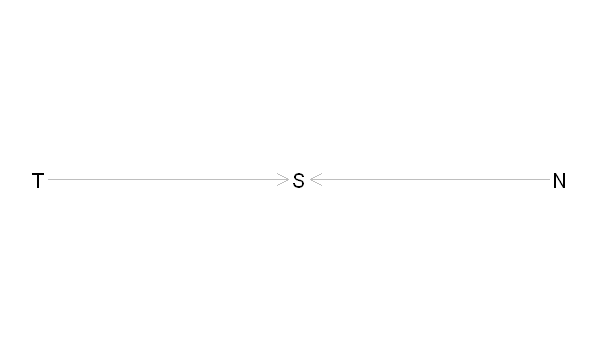

In [106]:
research_dag <- dagitty( "dag {
    T -> S
    N -> S
}")
coordinates( research_dag ) <- list( x=c(T=0,S=1,N=2) ,
                                  y=c(T=0,S=0,N=0) )
plot( research_dag )

The fact that two arrows enter S means it is a <span style='background-color: lightgreen'>collider</span>. This is perhaps an unhelpful label. But the core concept is easy to understand: <font color = 'green'>When you condition on a collider, it creates statistical—but not necessarily causal—associations among its causes</font>. 

* <font color = 'green'>**In this case, once you learn that a proposal has been selected (S), then learning its trustworthiness (T) also provides information about its newsworthiness (N)**</font>. 

    **<font color = 'purple' style='background-color: lightyellow'>Why?</font>** Because if, for example, a selected proposal has low trustworthiness, then it must have high newsworthiness. Otherwise it wouldn’t have been funded. 
    
    
* The same works in reverse: If a proposal has low newsworthiness, we’d infer that it must have higher than average trustworthiness. Otherwise it would not have been selected for funding.

<font color = 'blue'>This is the informational phenomenon that generates the negative association between T and N in the population of selected proposals. And it means we have to pay attention to processes that select our sample of observations and may distort associations among variables</font>. 

<font color = 'red'>But the same phenomenon will also generate a misleading association inside a statistical model, when you include the collider as a predictor variable</font>. If you are not careful, you can make an erroneous causal inference. Let’s consider an extended example.

### Collider of false sorrow.

**<font color = 'purple' style='background-color: lightyellow'>Consider the question of how aging influences happiness. If we have a large survey of people rating how happy they are, is age associated with happiness?</font>**

**<font color = 'purple' style='background-color: lightyellow'>If so, is that association causal? </font>** <font color = 'blue'>Here, I want to show you how controlling for a plausible confound of happiness can actually bias inference about the influence of age</font>.83

Suppose, just to be provocative, that an individual’s average happiness is a trait that is determined at birth and does not change with age. However, happiness does influence events in one’s life. One of those events is marriage. Happier people are more likely to get married. Another variable that causally influences marriage is age: The more years you are alive, the more likely you are to eventually get married. Putting these three variables together, this is the causal model:

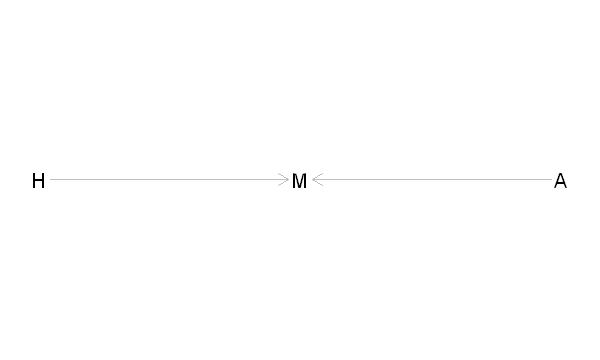

In [107]:
happiness_dag <- dagitty( "dag {
    H -> M
    A -> M
}")
coordinates( happiness_dag ) <- list( x=c(H=0,M=1,A=2) ,
                                  y=c(H=0,M=0,A=0) )
plot( happiness_dag )

Happiness (H) and age (A) both cause marriage (M). Marriage is therefore a collider. <font color = 'green'>**Even though there is no causal association between happiness and age, if we condition on marriage— <span style='background-color: lightyellow'>which means here, if we include it as a predictor in a regression</span>—then it will induce a statistical association between age and happiness**</font>. And this can mislead us to think that happiness changes with age, when in fact it is constant.

**<font color = 'purple' style='background-color: lightyellow'>To convince you of this, let’s do another simulation</font>**. 

> Simulations are useful in these examples, because these are the only times when we know the true causal model. If a procedure cannot figure out the truth in a simulated example, we shouldn’t trust it in a real one. 

**<font color = 'purple' style='background-color: lightyellow'>We’re going to do a fancier simulation this time, using an agent-based model of aging and marriage to produce a simulated data set to use in a regression</font>**. Here is the simulation design:

(1) Each year, 20 people are born with uniformly distributed happiness values.


(2) Each year, each person ages one year. Happiness does not change.


(3) At age 18, individuals can become married. The odds of marriage each year are proportional to an individual’s happiness.


(4) Once married, an individual remains married.


(5) After age 65, individuals leave the sample. (They move to Spain.)

I’ve written this algorithm into the rethinking package. You can run it out for 1000 years and collect the resulting data:

In [32]:
d <- sim_happiness( seed=1977 , N_years=1000 )

In [51]:
d %>% str()

'data.frame':	1300 obs. of  3 variables:
 $ age      : num  65 65 65 65 65 65 65 65 65 65 ...
 $ married  : num  0 0 1 0 0 0 1 1 0 0 ...
 $ happiness: num  -2 -1.79 -1.58 -1.37 -1.16 ...


In [67]:
# sim_happiness()
sim_happiness <- function (seed = 1977, N_years = 1000, max_age = 65, N_births = 20, aom = 18) 
{
    set.seed(seed)
    
    H <- M <- A <- c()
    
    for (t in 1:N_years) {
        # age
        A <- A + 1
        A <- c(A, rep(1, N_births)) 
        # keeps expanding A by 20 each year
        
        # happiness uniformly distributed 
        H <- c(H, seq(from = -2, to = 2, length.out = N_births))
        
        # married logical
        M <- c(M, rep(0, N_births))
        
        
        for (i in 1:length(A)) {
            if (A[i] >= aom & M[i] == 0) {
                M[i] <- rbern(1, inv_logit(H[i] - 4))
                # sample from Bernoulli distribution using rescaled happiness as probability
            }
        }
        deaths <- which(A > max_age)
        if (length(deaths) > 0) {
            A <- A[-deaths]
            H <- H[-deaths]
            M <- M[-deaths]
        }
    }
    d <- data.frame(age = A, married = M, happiness = H)
    return(d)
}


In [60]:
precis(d)[,1:4] %>% round(2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
age,33.0,18.77,4.00,62.00
married,0.3,0.46,0.00,1.00
happiness,0.0,1.21,-1.79,1.79


In [54]:
d %>% precis(hist=FALSE) %>% round(2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
age,33.0,18.77,4.00,62.00
married,0.3,0.46,0.00,1.00
happiness,0.0,1.21,-1.79,1.79


These data comprise 1300 people of all ages from birth to 65 years old. The variables correspond to the variables in the DAG above, and the simulation itself obeys the DAG.

**<font color = 'purple' style='background-color: lightyellow'>I’ve plotted these data in Figure 6.5</font>**, showing each individual as a point. 
* Filled points are married individuals. Age is on the horizontal, and happiness the vertical, with the happiest individuals at the top. 
* At age 18, they become able to marry, and then gradually more individuals are married each year. So at older ages, more individuals are married. But at all ages, the happiest individuals are more likely to be married.

Suppose you come across these data and want to ask whether age is related to happiness.
You don’t know the true causal model. But you reason, reasonably, that marriage status
might be an important confound. If married people are more or less happy, on average, then
you need to condition on marriage status in order to infer the relationship between age and
happiness.

So let’s consider a multiple regression model aimed at inferring the influence of age on
happiness, while controlling for marriage status. This is just a plain multiple regression, like the others in this and the previous chapter. The linear model is this:

<img src='pics/SR_l38.png' alt='Drawing' style='width:125pt'/>

<img src='pics/SR_l37.png' alt='Drawing' style='width:425pt'/>

<font color = 'green'>**where `mid[i]` is an index for the marriage status of individual i**</font>, with 1 meaning single and 2 meaning married. <font color = 'green'>This is just the categorical variable strategy from Chapter 4. It’s easier to make priors, when we use multiple intercepts, one for each category, than when we use indicator variables</font>. 

**<font color = 'purple' style='background-color: lightyellow'>Now we should do our duty and think about the priors</font>**. 

* Let’s consider the slope $β_A$ first, because how we scale the predictor A will determine the meaning of the intercept. 

* We’ll focus only on the adult sample, those 18 or over. 

* Imagine a very strong relationship between age and happiness, such that happiness is at its maximum at age 18 and its minimum at age 65. It’ll be easier if we rescale age so that the range from 18 to 65 is one unit. This will do it:

In [113]:
## R code 6.23
d2 <- d[ d$age>17 , ] # only adults
d2$A <- ( d2$age - 18 ) / ( 65 - 18 )

<font color = 'green'>

* Now this new variable `A` ranges from 0 to 1, where 0 is age 18 and 1 is age 65.


* `Happiness` is on an arbitrary scale, in these data, from −2 to +2. So our imaginary strongest relationship, taking happiness from maximum to minimum, has a slope with rise over run of (2 − (−2))/1 = 4. 

    Remember that 95% of the mass of a normal distribution is contained within 2 standard deviations. So if we set the standard deviation of the prior to half of 4, we are saying that we expect 95% of plausible slopes to be less than maximally strong. That isn’t a very strong prior, but again, it at least helps bound inference to realistic ranges.
    
    
* Now for the intercepts. Each `α` is the value of $µ_i$ when $A_i$ = 0. In this case, that means at age 18. So we need to allow α to cover the full range of happiness scores. Normal(0, 1) will put 95% of the mass in the −2 to +2 interval. 
    </font>

Finally, let’s approximate the posterior. We need to construct the marriage status index variable, as well. I’ll do that, and then immediate present the quap code.

<img src='pics/SR_e39a.png' alt='Drawing' style='width:425pt'/>

In [116]:
## R code 6.24
d2$mid <- d2$married + 1
m6.9 <- quap(
    alist(
        happiness ~ dnorm( mu , sigma ),
        mu <- a[mid] + bA*A, #[mid] <- categorical for marriage status
        a[mid] ~ dnorm( 0 , 1 ), 
        bA ~ dnorm( 0 , 2 ),
        sigma ~ dexp(1)
    ) , data=d2 )
precis(m6.9,depth=2) %>% round(2)


,mean,sd,5.5%,94.5%
a[1],-0.23,0.06,-0.34,-0.13
a[2],1.26,0.08,1.12,1.40
bA,-0.75,0.11,-0.93,-0.57
sigma,0.99,0.02,0.95,1.03


The model is quite sure that age is negatively associated with happiness. We’d like to compare the inferences from this model to a model that omits marriage status. Here it is, followed by a comparison of the marginal posterior distributions:

In [117]:
## R code 6.25
m6.10 <- quap(
    alist(
        happiness ~ dnorm( mu , sigma ),
        mu <- a + bA*A,
        a ~ dnorm( 0 , 1 ),
        bA ~ dnorm( 0 , 2 ),
        sigma ~ dexp(1)
    ) , data=d2 )
precis(m6.10) %>% round(2)

,mean,sd,5.5%,94.5%
a,0.00,0.08,-0.12,0.12
bA,0.00,0.13,-0.21,0.21
sigma,1.21,0.03,1.17,1.26


This model, in contrast, finds no association between age and happiness.

The pattern above is exactly what we should expect when we condition on a collider. <font color = 'red'>**The collider is marriage status. It a common consequence of age and happiness. As a result, when we condition on it, we induce a spurious association between the two causes**</font>. 

* So it looks like, to model m6.9, that age is negatively associated with happiness. But this is just a statistical association, not a causal association. <font color = 'red'>**Once we know whether someone is married or not, then their age does provide information about how happy they are**</font>. You can see this in Figure 6.5.<font color = 'blue'> Consider only the blue points, the married people. Among only the blue points, older individuals have lower average happiness</font>. <font color = 'blue'>**This is because more people get marriage at time goes on, so the mean happiness among married people approaches the population average of zero**</font>. 

    <font color = 'blue'>Now consider only the open points, the unmarried people. Here it is also true that mean happiness declines with age. This is because happier individuals migrate over time into the married sub-population. So in both the married and unmarried sub-populations, there is a negative relationship between age and happiness. But in neither sub-population does this accurately reflect causation</font>.
    
It’s easy to plead with this example. Shouldn’t marriage also influence happiness? What if happiness does change with age? But these pleas miss the point. <font color = 'red'>**If you don’t have a causal model, you can’t make inferences from a multiple regression. And the regression itself does not provide the evidence you need to justify a causal model**</font>. Instead, you need some science.

### The haunted DAG.

<span style='background-color: lightgreen'>Collider bias</span> <font color = 'green'>**arises from conditioning on a common consequence**</font>, as in the previous example. 

<font color = 'red'>If we can just get our graph sorted, we can avoid it</font>. But it isn’t always so easy to see a potential collider, because there may be unmeasured causes. Unmeasured causes can still induce collider bias. So I’m sorry to say that we also have to consider the possibility that our DAG may be haunted. 

**<font color = 'purple' style='background-color: lightyellow'>Suppose for example that we are interested in inferring the direct influence of both parents (P) and grandparents (G) on the educational achievement of children (C)</font>**.84 Since grandparents also presumably influence their own children’s education, there is an arrow G → P. This sounds pretty easy, so far. It’s just like our divorce rate example from last chapter:

In [2]:
library(dagitty)

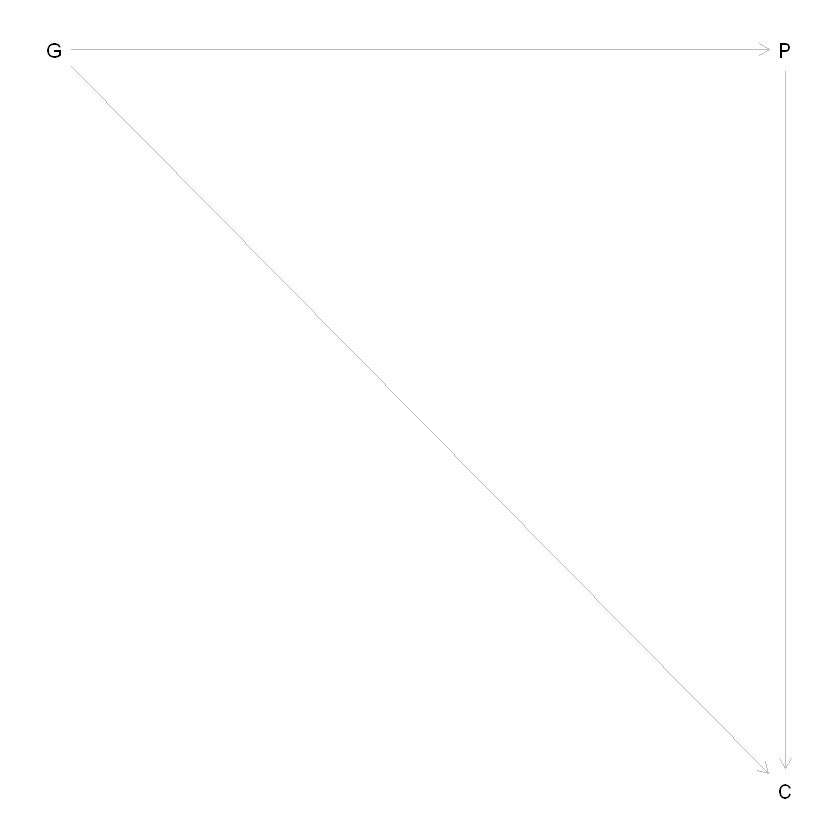

In [3]:
research_dag <- dagitty( "dag {
    G -> P
    P -> C
    G -> C
}")
coordinates( research_dag ) <- list(x=c(G=0,P=1,C=1) ,
                                    y=c(G=0,P=0,C=1))
plot( research_dag )

**<font color = 'purple' style='background-color: lightyellow'>But suppose there are unmeasured, common influences on parents and their children, such as neighborhoods, that are not shared by grandparents (who live on the south coast of Spain now).</font>** <font color = 'red'>Then our DAG becomes haunted by the unobserved U:</font>

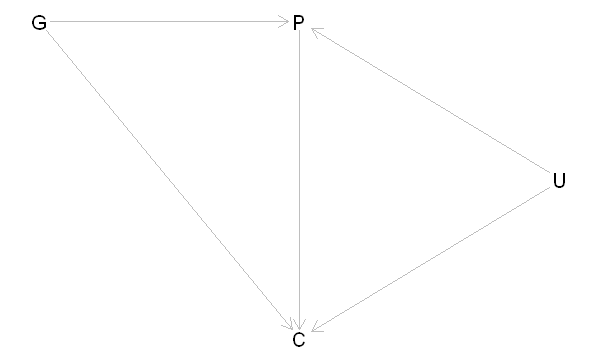

In [123]:
research_dag <- dagitty( "dag {
    G -> P
    P -> C
    G -> C
    U -> P
    U -> C
}")
coordinates( research_dag ) <- list(x=c(G=0,P=1,C=1, U=2) ,
                                    y=c(G=0,P=0,C=1, U=0.5))
plot( research_dag )

Now P is a common consequence of G and U, so if we condition on P, it will bias inference about G → C, even if we never get to measure U. I don’t expect that fact to be immediately obvious. So let’s crawl through a quantitative example. 

**<font color = 'purple' style='background-color: lightyellow'>First, let’s simulate 200 triads of grandparents, parents, and children</font>**<font color = 'purple'>. This simulation will be simple. We’ll just project our DAG as a series of implied functional relationships. The DAG above implies that</font>

1. P is some function of G and U
* C is some function of G, P, and U
* G and U are not functions of any other known variables


We can make these implications into a simple simulation, using `rnorm` to generate simulated observations. But to do this, we need to be a bit more precise than “some function of.” So I’ll invent some strength of association:

In [73]:
## R code 6.26
N <- 200  # number of grandparent-parent-child triads
b_GP <- 1 # direct effect of G on P
b_GC <- 0 # direct effect of G on C
b_PC <- 1 # direct effect of P on C
b_U <- 2  # direct effect of U on P and C


<font color = 'green'>**These parameters are like slopes in a regression model.**</font> 

<font color = 'blue'>Notice that I’ve assumed that grandparents G have zero effect on their grandkids C</font>. The example doesn’t depend upon that effect being exactly zero, but it will make the lesson clearer. Now we use these slopes to draw random observations:

In [74]:
## R code 6.27
set.seed(1)
U <- 2*rbern( N , 0.5 ) - 1
G <- rnorm( N )
P <- rnorm( N , b_GP*G + b_U*U )
C <- rnorm( N , b_PC*P + b_GC*G + b_U*U )
d <- data.frame( C=C , P=P , G=G , U=U )


<font color = 'green'>**I’ve made the neighborhood effect, U, binary.**</font> This will make the example easier to understand. But the example doesn’t depend upon that assumption. <font color = 'blue'>The other lines are just linear models embedded in rnorm. </font> 

**<font color = 'purple' style='background-color: lightyellow'>Now what happens when we try to infer the influence of grandparents?</font>**

<font color = 'green'>**Since some of the total effect of grandparents passes through parents, we realize we need to control for parents**</font>. Here is a simple regression of C on P and G. 

* <font color = 'purple'>Normally I would advise standardizing the variables, because it makes establishing sensible priors a lot easier. But I’m going to keep the simulated data on its original scale, so you can see what happens to inference about the slopes above</font>. If we changed the scale, we shouldn’t expect to get those values back. But if we leave the scale alone, we should be able to recover something close to those values. So I apologize for using vague priors here, just to push forward in the example.

In [127]:
## R code 6.28
m6.11 <- quap(
    alist(
        C ~ dnorm( mu , sigma ),
        mu <- a + b_PC*P + b_GC*G,
        a ~ dnorm( 0 , 1 ),
        c(b_PC,b_GC) ~ dnorm( 0 , 1 ),
        sigma ~ dexp( 1 )
    ), data=d )
precis(m6.11) %>% round(2) 

,mean,sd,5.5%,94.5%
a,-0.12,0.10,-0.28,0.04
b_PC,1.79,0.04,1.72,1.86
b_GC,-0.84,0.11,-1.01,-0.67
sigma,1.41,0.07,1.30,1.52


<img src='pics/SR_l39.png' alt='Drawing' style='width:425pt'/>

The inferred effect of parents looks too big, almost twice as large as it should be. That isn’t surprising. Some of the correlation between P and C is due to U, and the model doesn’t know about U. That’s a simple confound. More surprising is that the model is confident that the direct effect of grandparents is to hurt their grandkids. <font color = 'blue'>The regression is not wrong. But a causal interpretation of that association would be.</font>

**<font color = 'purple' style='background-color: lightyellow'>How does collider bias arise in this case?</font>** Consider Figure 6.6. 

* Note that I did standardize the variables to make this plot. So the units on the axes are z-scores. 


* The horizontal axis is grandparent education. The vertical is grandchild education. 


* There are two clouds of points. The blue cloud comprises children who live in good neighborhoods (U = 1). The black cloud comprises children who live in bad neighborhoods (U = −1). 


* <font color = 'green'>**Notice that both clouds of points show positive associations between G and C**</font>. 

* <font color = 'red'>More educated grandparents have more educated grandkids, but this effect arises entirely through parents. Why? Because we assumed it is so. The direct effect of G in the simulation is zero</font>.

**<font color = 'purple' style='background-color: lightyellow'>So how does the negative association arise, when we condition on parents? </font>**

**<font color = 'purple' style='background-color: lightyellow'>Conditioning on parents is like looking within sub-populations of parents with similar education. So let’s try that</font>**. 

* In Figure 6.6, <font color = 'blue'>I’ve highlighted in filled points those parents between the 45th and 60th centiles of education. There is nothing special of this range. It just makes the phenomenon easier to see</font>.

    Now if we draw a regression line through only these points, regressing C on G, the slope is negative. There is the negative association that our multiple regression finds. 
    
**<font color = 'purple' style='background-color: lightyellow'>But why does it exist?</font>**

It exists because, once we know P, learning G invisibly tells us about the neighborhood U, and U is associated with the outcome C. 

<font color = 'lightgrey'>I know this is confusing. As I keep saying, if you are confused, it is only because you are paying attention.</font>

<font color = 'purple'>So consider two different parents with the same education level, say for example at the median 50th centile. One of these parents has a highly educated grandparent. The other has a poorly educated grandparent</font>. <font color = 'blue'>The only probable way, in this example, for these parents to have the same education is if they live in different types of neighborhoods</font>.

We can’t see these neighborhood effects—we haven’t measured them, recall—but the influence of neighborhood is still transmitted to the children C. So for our mythical two P with the same education, the one with the highly educated G ends up with a less well educated C. The one with the less educated G ends up with the better educated C. G predicts lower C.

><font color = 'blue'> The unmeasured U makes P a collider, and conditioning on P produces collider bias. So what can we do about this? You have to measure U. Here’s the regression that conditions also on U:</font>

In [128]:
## R code 6.29
m6.12 <- quap(
    alist(
        C ~ dnorm( mu , sigma ),
        mu <- a + b_PC*P + b_GC*G + b_U*U,
        a ~ dnorm( 0 , 1 ),
        c(b_PC,b_GC,b_U) ~ dnorm( 0 , 1 ),
        sigma ~ dexp( 1 )
    ), data=d )
precis(m6.12) %>% round(2) 


,mean,sd,5.5%,94.5%
a,-0.12,0.07,-0.24,-0.01
b_PC,1.01,0.07,0.91,1.12
b_GC,-0.04,0.10,-0.20,0.11
b_U,2.00,0.15,1.76,2.23
sigma,1.02,0.05,0.94,1.10


And those are the slopes we simulated with.

**Rethinking**: Statistical paradoxes and causal explanations. The grandparents example serves as an example of Simpson’s paradox: Including another predictor (P in this case) can reverse the direction of association between some other predictor (G) and the outcome (C). Usually, Simpson’s paradox is presented in cases where adding the new predictor helps us. But in this case, it misleads us. Simpson’s paradox is a statistical phenomenon. <font color = 'red'>To know whether the reversal of the association correctly reflects causation, we need something more than just a statistical model</font>.85

## Confronting confounding

In this chapter and in the previous one, there have been several examples of how we can use multiple regression to deal with confounding. But we have also <font color = 'blue'>seen how multiple regression can cause confounding—controlling for the wrong variables ruins inference</font>. <font color = 'blue'>Hopefully I have succeeded in scaring you away from just adding everything to a model and hoping regression will sort it out, as well as inspired you to believe that effective inference is possible, if we are careful enough and knowledgable enough</font>.

<font color = 'purple'>But what exactly is confounding? And which principles explain why sometimes leaving out variables and sometimes adding them can produce the same phenomenon?</font> Are there other causal monsters lurking out there, haunting our graphs? We require some coherence.

**<font color = 'purple' style='background-color: lightyellow'>Confounding is any context in which the association between an outcome Y and a predictor of interest X is not the same as it would be, if we had experimentally determined the values of X</font>**.86 

<font color = 'purple'>For example</font>, in the previous example, the association between education and wages is confounded by the unobserved variable U. If we had assigned education levels to people, we’d get a different estimate for the association. <font color = 'blue'>**Directly manipulating education turns the graph on the left into the graph on the right.**</font>

<img src='pics/SR_l40.png' alt='Drawing' style='width:425pt'/>

**<font color = 'purple' style='background-color: lightyellow'>How does it do this?</font>** In the graph on the left, there are two paths connecting E and W: (1) E → W and (2) E ← U → W. 

> <font color = 'green'>**A “<span style='background-color: lightgreen'>path</span>” here just means any series of variables you could walk through to get from one variable to another, ignoring the directions of the arrows**</font>. 

<font color = 'green'>**Manipulation removes the influence of U on E**</font>. <font color = 'green'>This then stops information from flowing between E and W through U. It blocks the second path. Once the path is blocked, there is only one way for information to go between E and W, and then measuring the association between E and W could yield a useful measure of causal influence</font>. <font color = 'red'>Manipulation removes the confounding, because it blocks the other path between E and W.</font>

**<font color = 'purple' style='background-color: lightyellow'>Now consider that there are statistical ways to achieve the same result, without actually manipulating E. How?</font>**<font color = 'blue'> The most obvious is to add U to the model, to condition on U</font>. 

**<font color = 'purple' style='background-color: lightyellow'>Why does this also remove the confounding?</font>** <font color = 'blue'>Because it also blocks the flow of information between E and W through U. It blocks the second path.</font>

<font color = 'blue'>To understand why conditioning on U blocks the path E ← U → W, think of this path in isolation, as a complete model</font>. Once you learn U, also learning E will give you no additional information about W. Suppose for example that U is the average wealth in a region. Regions with high wealth have better schools, resulting in more education E, as well as better paying jobs, resulting in higher wages W. 

If you don’t know the region a person lives in, learning the person’s education E will provide information about their wages W, because E and W are correlated across regions. <font color = 'blue'>But after you learn which region a person lives in, assuming there is no other path between E and W, then learning E tells you nothing about W. This is the sense in which condition on U blocks the path—it makes E and W independent, conditional on U.</font>

### Shutting the backdoor.

<font color = 'green'>Blocking all confounding paths between some predictor X and some outcome Y is known as shutting the backdoor</font>. The metaphor in play is that we don’t want any spurious correlation sneaking in through the back. Now for some good news. <font color = 'green'>**Given a causal DAG, it is always possible to say which, if any, variables one must control for in order to shut all the backdoor paths**</font>. It also possible to say which variables one must not control for, in order to leave the path of interest open. 

And—some more good news—there are only four types of DAG relations that combine to form all possible paths. So you really only need to understand four things and how information flows in each of them. I’ll define the four types of relations. Then we’ll work through some examples.

<img src='pics/SR_l41.png' alt='Drawing' style='width:425pt'/>

**The first** type of relation is the one we worked with just above, a <span style='background-color: lightgreen'>fork</span>: X ← Z → Y. This is the classic confound. <font color = 'green'>In a fork, some variable Z is a common cause of X and Y, generating a correlation between them. If we condition on Z, then learning X tells us nothing about Y. X and Y are independent, conditional on Z.</font>

**The second** type of relation is a <span style='background-color: lightgreen'>pipe</span>: X → Z → Y. We saw this when we discussed the plant growth example and post-treatment bias: <font color = 'green'>The treatment X influences fungus Z which influences growth Y. If we condition on Z now, we also block the path from X to Y</font>. 

<font color = 'red'>**So in both a <span style='background-color: lightyellow'>fork</span> and a <span style='background-color: lightyellow'>pipe</span>, conditioning of the middle variable blocks the path. <span style='background-color: lightyellow'>Importantly, often we do not want to block the path, because we want to learn about the association between X and Y**</span>.</font>

**The third** type of relation is a <span style='background-color: lightgreen'>collider</span>: X → Z ← Y. You met colliders earlier in this chapter. Unlike the other two types of relations, <font color = 'green'>in a collider there is no association between X and Y unless you condition on Z. Conditioning on Z, the collider variable, opens the path. Once the path is open, information flows between X and Y</font>.

**The fourth** bit of knowledge you need is that conditioning on a <span style='background-color: lightgreen'>descendent</span> variable is like conditioning on the variable itself, but weaker. For example, in the following DAG, K is a descendent of Z:

<img src='pics/SR_l42.png' alt='Drawing' style='width:175pt'/>

<font color = 'green'>Now controlling for K will also control, to a lesser extent, for Z. This will (partially) block the path from X to Y</font>. The same holds for colliders. <font color = 'red'>If you condition on a descendent of a collider, it’ll still be like (weakly) conditioning on a collider.</font>

<font color = 'blue'>**No matter how complicated a causal DAG appears, it is always built out of these four types of relations**</font>. And <font color = 'green'>**since you know how to open and close each, you (or your computer) can figure out which variables you need to control—or not—in order to shut the backdoor**</font>.

**<font color = 'purple' style='background-color: lightyellow'> Let’s consider some examples.</font>**

### Two road

<img src='pics/SR_m31.png' alt='Drawing' style='width:325pt'/>

The DAG below contains an exposure of interest X, an outcome of interest Y, an unobserved variable U, and three observed covariates (A, B, and C).

<img src='pics/SR_l43.png' alt='Drawing' style='width:225pt'/>

**<font color = 'purple' style='background-color: lightyellow'>We are interested in the <font color = 'blue'>blue path</font>, the causal effect of X on Y. Which of the observed covariates do we need to add to the model, in order to correctly infer it?</font>** To figure this out, look for backdoor paths. Aside from the direct path, there are two paths from X to Y:

(1) X ← U ← A → C → Y

(2) X ← U → B ← C → Y

**<font color = 'purple' style='background-color: lightyellow'>Now ask which of these paths is open.</font>** <font color = 'green'>If a path is open, then it is a backdoor into Y, and we must close it. If a path is closed already, then we must not accidentally open it and create a backdoor.</font>

Consider the first path, passing through A. This path is open, because there is no collider within it. There is just a fork at the top and two pipes, one on each side. Information will flow through this path, confounding X → Y. <font color = 'green'>**It is a backdoor. To shut this backdoor, we need to condition on one of its variables**</font>. 

* We can’t condition on U, since it is unobserved. That leaves A or C. Either will shut the backdoor. 

* You can ask your computer to reproduce this analysis, to analyze the graph and find the necessary variables to control for in order to block the backdoor. The `dagitty` R package provides `adjustmentSets` for this purpose:

In [130]:
## R code 6.30
library(dagitty)
dag_6.1 <- dagitty( "dag {
    X -> Y <- C
    X <- U -> B
    U <- A -> C
    U -> B <- C
}")
adjustmentSets( dag_6.1 , exposure="X" , outcome="Y" )

 { C }
 { A }
 { U }

We didn’t tell the computer that U is unobserved, so it suggests it as well.

**<font color = 'purple' style='background-color: lightyellow'>Now consider the second path, passing through B.</font>** 

* This path does contain a collider, U → B ← C. It is therefore already closed. It is not a backdoor, and that is why adjustmentSets above did not mention B. 


* <font color = 'red'>**You don’t need to control for B. But if we do condition on B, it is not harmless. It will open the path, creating a confound**</font>. Then our inference about X → Y will change, but without the DAG, we won’t know whether that change is helping us or rather misleading us.

### Backdoor waffles

<font color = 'purple'>As a final example, let’s return to the Waffle House and divorce rate correlation from the introduction to Chapter 5</font>. **<font color = 'purple' style='background-color: lightyellow'>We’ll make a DAG, use it to find a minimal set of covariates, and use it as well to derive the testable implications of the DAG</font>**. 

* This is important, because sometimes you really can test whether your DAG is consistent with the evidence. <font color = 'red'>The data alone can never tell us when a DAG is right. But the data can tell us when a DAG is wrong</font>. 

We’re interested in the total causal effect of the number of Waffle Houses on divorce rate in each State. Presumably, the naive correlation between these two variables is spurious. What is the minimal adjustment set that will block backdoor paths from Waffle House to divorce? Let’s make a graph:

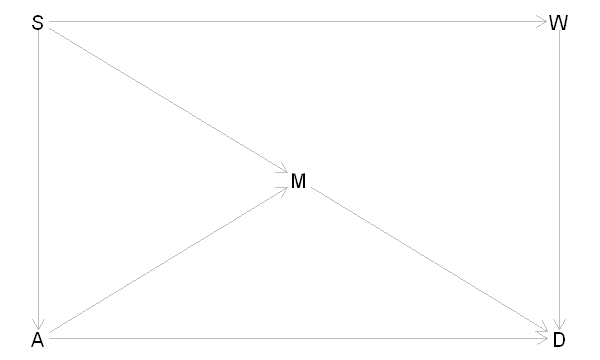

In [138]:
## R code 6.31
library(dagitty)
dag_6.2 <- dagitty( "dag {
    S -> A -> D
    S -> M -> D
    S -> W -> D
    A -> M
}")

coordinates( dag_6.2 ) <- list( x=c(S=0, A=0, M=1, W=2, D=2),
                                  y=c(S=0, A=2, M=1, W=0, D=2) )
plot(dag_6.2)



<font color = 'purple'>In this graph, S is whether or not a State is in the southern United States, A is median age at marriage, M is marriage rate, W is number of Waffle Houses, and D is divorce rate. </font>

This graph assumes that southern States have lower ages of marriage (S → A), higher rates of marriage both directly (S → M) and mediated through age of marriage (S → A → M), as well as more waffles (S → W). Age of marriage and marriage rate both influence divorce.

<font color = 'blue'>There are three open backdoor paths between W and D</font>. 

* Just trace backwards, starting at W and ending up at D. But notice that all of them pass first through S. So we can close them all by conditioning on S. 

That’s all there is to it. You can get your computer to confirm this answer:

In [139]:
adjustmentSets( dag_6.2 , exposure="W" , outcome="D" )

 { A, M }
 { S }

<font color = 'red'>We could control for either A and M or for S alone. If you don’t have to add something to the model, then don’t.</font>

But is this graph correct? <font color = 'red'>**The data cannot tell us whether a graph is correct, but it can strongly suggest that a graph is wrong**</font>. 

> <font color = 'blue'>The reason is that any graph implies various conditional independencies, pairs of variables that are not associated, once we condition on some set of other variables</font>. 

By listing these implied conditional independencies and assessing each, we can at least test some of the features of a graph.

You can find conditional independencies using the same path logic you learned for finding and closing backdoors.

* You just have to focus on a pair of variables, find all paths connecting them, and figure out if there is any set of variables you could condition on to close them all. 

<font color = 'lightgrey'>In a large graph, this is quite a chore, because there are many pairs of variables and possibly many paths. But your computer is good at such chores.</font> In this case, there are three implied conditional independencies:

In [140]:
impliedConditionalIndependencies( dag_6.2 ) 

A _||_ W | S
D _||_ S | A, M, W
M _||_ W | S

* <font color = 'green'>**Read the first as “median age of marriage should be independent of (`_||_`) Waffle Houses, conditioning on (`|`) a State being in the south.”**</font> 


* In the second, divorce and being in the south should be independent when we simultaneously condition on all of median age of marriage, marriage rate, and Waffle Houses. 


* Finally, marriage rate and Waffle Houses should be independent, conditioning on being in the south.

**Overthinking**: A smooth operator. To define confounding with precise notation, we need to adopt something called the do-operator.87 Confounding occurs when: 

`Pr(Y|X) ̸= Pr(Y|do(X))` 

<font color = 'green'>That do(X) means to cut or block all of the backdoor paths into X, as if we did a manipulative experiment</font>. <font color = 'green'>**The do-operator changes the graph, closing the backdoors**</font>. 

* <font color = 'green'>The do-operator defines a causal relationship, because Pr(Y|do(X)) tells us the expected result of manipulating X on Y, given a causal graph</font>. <font color = 'green'>**We might say that some variable X is a cause of Y when Pr(Y|do(X)) > Pr(Y|do(not-X))**</font>. 


* <font color = 'red'>The ordinary conditional probability comparison, Pr(Y|X) > Pr(Y|not-X), is not the same. It does not close the backdoor</font>. 


* <font color = 'green'>**Note that what the do-operator gives you is not just the direct causal effect. It is the total causal effect through all forward paths**</font>. <font color = 'green'>To get a direct causal effect, you might have to close more doors.</font> The do-operator can also be used to derive causal inference strategies even when some back doors cannot be closed. We’ll look at a couple in a later chapter.

## Summary

<font color = 'blue'>**Multiple regression is no oracle. It is logical, but the relationships it describes are conditional associations, not causal influences. Therefore additional information, from outside the model, is needed to make sense of it.**</font> 

This chapter presented introductory examples of some common frustrations: multicollinearity, post-treatment bias, and collider bias. 

Solutions to these frustrations must make use of the same tools—an instrumental variable leverages a collider in a positive way. 

<font color = 'blue'>In all cases, causal models exist outside the statistical model and can be very difficult to test</font>. However, it is possible to make valid causal inferences in the absence of experiments. This is good news, because both for practical and ethical reasons, we often have to.

# MISC

##### wine example

In [9]:
data(Wines2012)
d <- Wines2012

In [10]:
d %>% head

judge,flight,wine,score,wine.amer,judge.amer
Jean-M Cardebat,white,A1,10,1,0
Jean-M Cardebat,white,B1,13,1,0
Jean-M Cardebat,white,C1,14,0,0
Jean-M Cardebat,white,D1,15,0,0
Jean-M Cardebat,white,E1,8,1,0
Jean-M Cardebat,white,F1,13,1,0


In [11]:
data(NWOGrants)
d <- NWOGrants
d %>% head

discipline,gender,applications,awards
Chemical sciences,m,83,22
Chemical sciences,f,39,10
Physical sciences,m,135,26
Physical sciences,f,39,9
Physics,m,67,18
Physics,f,9,2


##### fox example

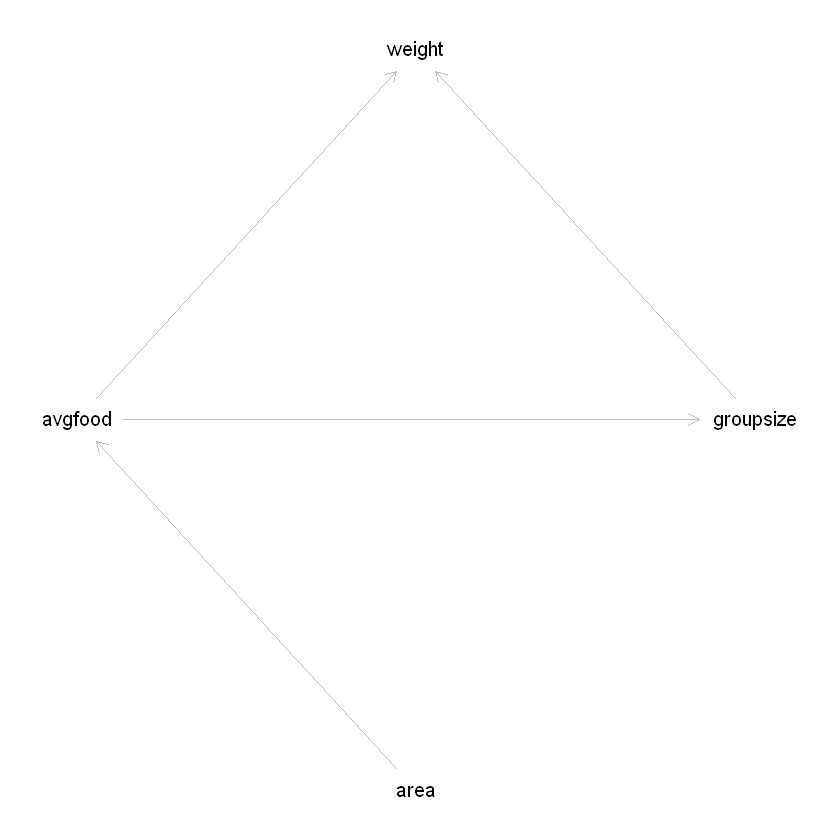

In [2]:
## R code 6.19
library(dagitty)
fox_dag <- dagitty( "dag {
    area -> avgfood
    avgfood -> groupsize
    groupsize -> weight
    avgfood -> weight
}")

coordinates( fox_dag ) <- list(x=c(area    = 0,
                                   avgfood = -1, groupsize = 1,
                                   weight  = 0),
                               y=c(area    = 2,
                                   avgfood = 1, groupsize = 1,
                                   weight  = 0)
                              )
plot( fox_dag )


In [4]:
adjustmentSets( fox_dag , exposure="groupsize" , outcome="weight" )

 { avgfood }

In [5]:
adjustmentSets( fox_dag , exposure="avgfood" , outcome="weight" )

 {}

In [6]:
adjustmentSets( fox_dag , exposure="area" , outcome="weight" )

 {}

##### prob mass vs density

A probability mass function differs from a probability density function (pdf) in that the latter is associated with continuous rather than discrete random variables; the values of the probability density function are not probabilities as such: a pdf must be integrated over an interval to yield a probability.[2]

##### Generating data

In [100]:
# assign treatments and simulate fungus and growth
treatment <- rep( 0:1 , each=N/2 )
fungus <- rbinom( N , size=1 , prob=0.5 - treatment*0.4 )
h1 <- h0 + rnorm(N, 5 - 3*fungus)

# compose a clean data frame
d <- data.frame( h0=h0 , h1=h1 , treatment=treatment , fungus=fungus )
precis(d)[,1:4]


,mean,sd,5.5%,94.5%
h0,9.95978,2.1011623,6.570328,13.07874
h1,14.03445,2.8626733,8.434886,18.22074
treatment,0.50000,0.5025189,0.000000,1.00000
fungus,0.29000,0.4560480,0.000000,1.00000


##### Overthinking: Simulating collinearity. 

The code to produce Figure 6.4 involves writing a function that 

* generates correlated predictors, 

* fits a model, and 

* returns the standard deviation of the posterior distribution for the slope relating perc.fat to kcal.per.g. 

* Then the code repeatedly calls this function, with different degrees of correlation as input, and collects the results.

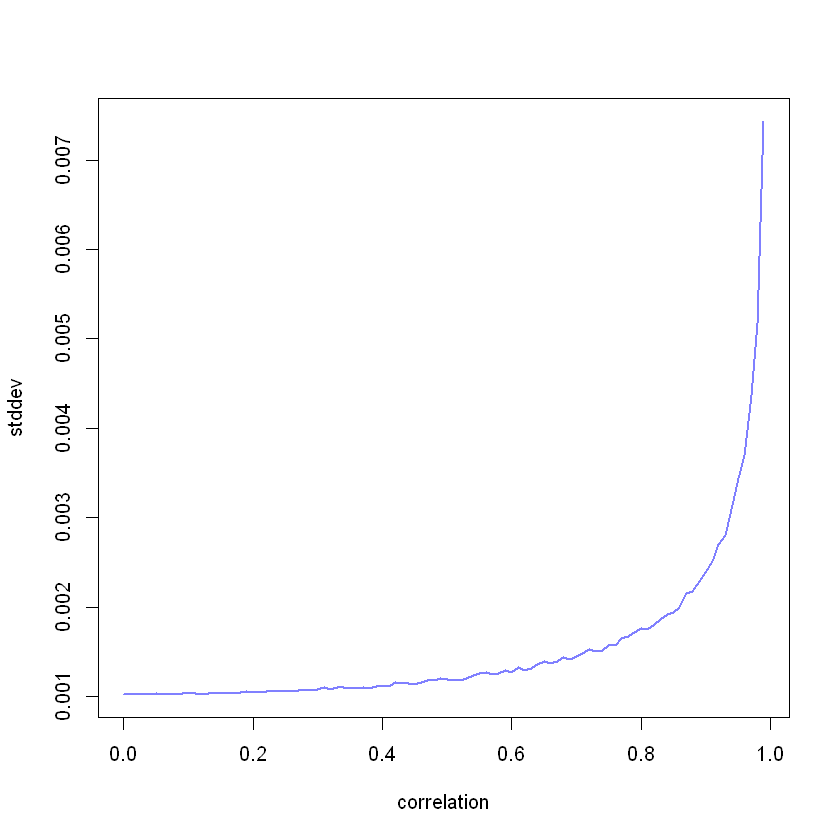

In [51]:
data(milk)
d <- milk
sim.coll <- function( r=0.9 ) {
    d$x <- rnorm( nrow(d) , mean=r*d$perc.fat ,
        sd=sqrt( (1-r^2)*var(d$perc.fat) ) )
    m <- lm( kcal.per.g ~ perc.fat + x , data=d )
    sqrt( diag( vcov(m) ) )[2] # stddev of parameter
}
rep.sim.coll <- function( r=0.9 , n=100 ) {
    stddev <- replicate( n , sim.coll(r) )
    mean(stddev)
}
r.seq <- seq(from=0,to=0.99,by=0.01)
stddev <- sapply( r.seq , function(z) rep.sim.coll(r=z,n=100) )
plot( stddev ~ r.seq , type="l" , col=rangi2, lwd=2 , xlab="correlation" )

So for each correlation value in r.seq, the code generates 100 regressions and returns the average standard deviation from them. This code uses implicit flat priors, which are bad priors. So it does exaggerate the effect of collinear variables. When you use informative priors, the inflation in standard deviation can be much slower.